In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('/penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


In [51]:
# задание 1.1
# Проверка на пропущенные значения
print("Пропущенные значения:")
print(data.isnull().sum())

# Удаление пропущенных значений
data_clean = data.dropna()
print(f"\nРазмер датасета после удаления пропусков: {data_clean.shape}")

# Проверка категориальных признаков
print("\nКатегориальные признаки:")
categorical_columns = data_clean.select_dtypes(include=['object']).columns
print(categorical_columns)
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

# Создаем копию данных для кодирования
data_encoded = data_clean.copy()

# Кодируем целевую переменную Species в указанном порядке
species_order = [['Chinstrap', 'Gentoo', 'Adelie']]  # Chinstrap=0, Gentoo=1, Adelie=2
encoder_species = OrdinalEncoder(categories=species_order)
data_encoded['Species_encoded'] = encoder_species.fit_transform(data_clean[['Species']])

# Для остальных категориальных признаков используем LabelEncoder
label_encoders = {}
for col in ['Island', 'Clutch Completion', 'Sex']:
    le = LabelEncoder()
    data_encoded[col + '_encoded'] = le.fit_transform(data_clean[col])
    label_encoders[col] = le

print("\nДанные после кодирования:")
print(data_encoded[['Species', 'Species_encoded', 'Island', 'Island_encoded',
                   'Clutch Completion', 'Clutch Completion_encoded',
                   'Sex', 'Sex_encoded']].head())


Пропущенные значения:
Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

Размер датасета после удаления пропусков: (325, 11)

Категориальные признаки:
Index(['Species', 'Island', 'Clutch Completion', 'Sex'], dtype='object')

Данные после кодирования:
     Species  Species_encoded  Island  Island_encoded Clutch Completion  \
0  Chinstrap              0.0   Dream               1               Yes   
1  Chinstrap              0.0   Dream               1               Yes   
2     Gentoo              1.0  Biscoe               0               Yes   
3  Chinstrap              0.0   Dream               1               Yes   
4     Gentoo              1.0  Biscoe               0               Yes   

   Clutch Completion_encoded     Sex  Sex_encoded

In [13]:
# задание 1.2
from sklearn.model_selection import train_test_split

# Фиксация random seed для воспроизводимости
np.random.seed(42)

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

# Проверка распределения классов
print("\nРаспределение классов в y_train:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nРаспределение классов в y_test:")
print(y_test.value_counts(normalize=True).sort_index())

Размер тренировочной выборки: (227, 2)
Размер тестовой выборки: (98, 2)

Распределение классов в y_train:
Species_encoded
0.0    0.207048
1.0    0.365639
2.0    0.427313
Name: proportion, dtype: float64

Распределение классов в y_test:
Species_encoded
0.0    0.204082
1.0    0.367347
2.0    0.428571
Name: proportion, dtype: float64


In [14]:
# Задача 1.3: Обучение kNN классификаторов
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Используем только два признака для визуализации
features_for_visualization = ['Flipper Length (mm)', 'Body Mass (g)']
X_train_vis = X_train[features_for_visualization]
X_test_vis = X_test[features_for_visualization]

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vis)
X_test_scaled = scaler.transform(X_test_vis)

# Параметры k для экспериментов
k_values = [1, 3, 5, 10, 15, 25]
classifiers = []  # Список для хранения обученных классификаторов

# Обучение классификаторов
train_scores = []
test_scores = []

print("NN\tTrain\tTest")
print("-" * 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    classifiers.append(knn)  # Сохраняем классификатор

    # Предсказания и оценка точности
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_scores.append(train_acc)
    test_scores.append(test_acc)

    print(f"{k}\t{train_acc:.2f}\t{test_acc:.2f}")

NN	Train	Test
--------------------
1	0.97	0.74
3	0.86	0.76
5	0.83	0.78
10	0.82	0.78
15	0.81	0.76
25	0.79	0.84


In [15]:
!pip install mlxtend

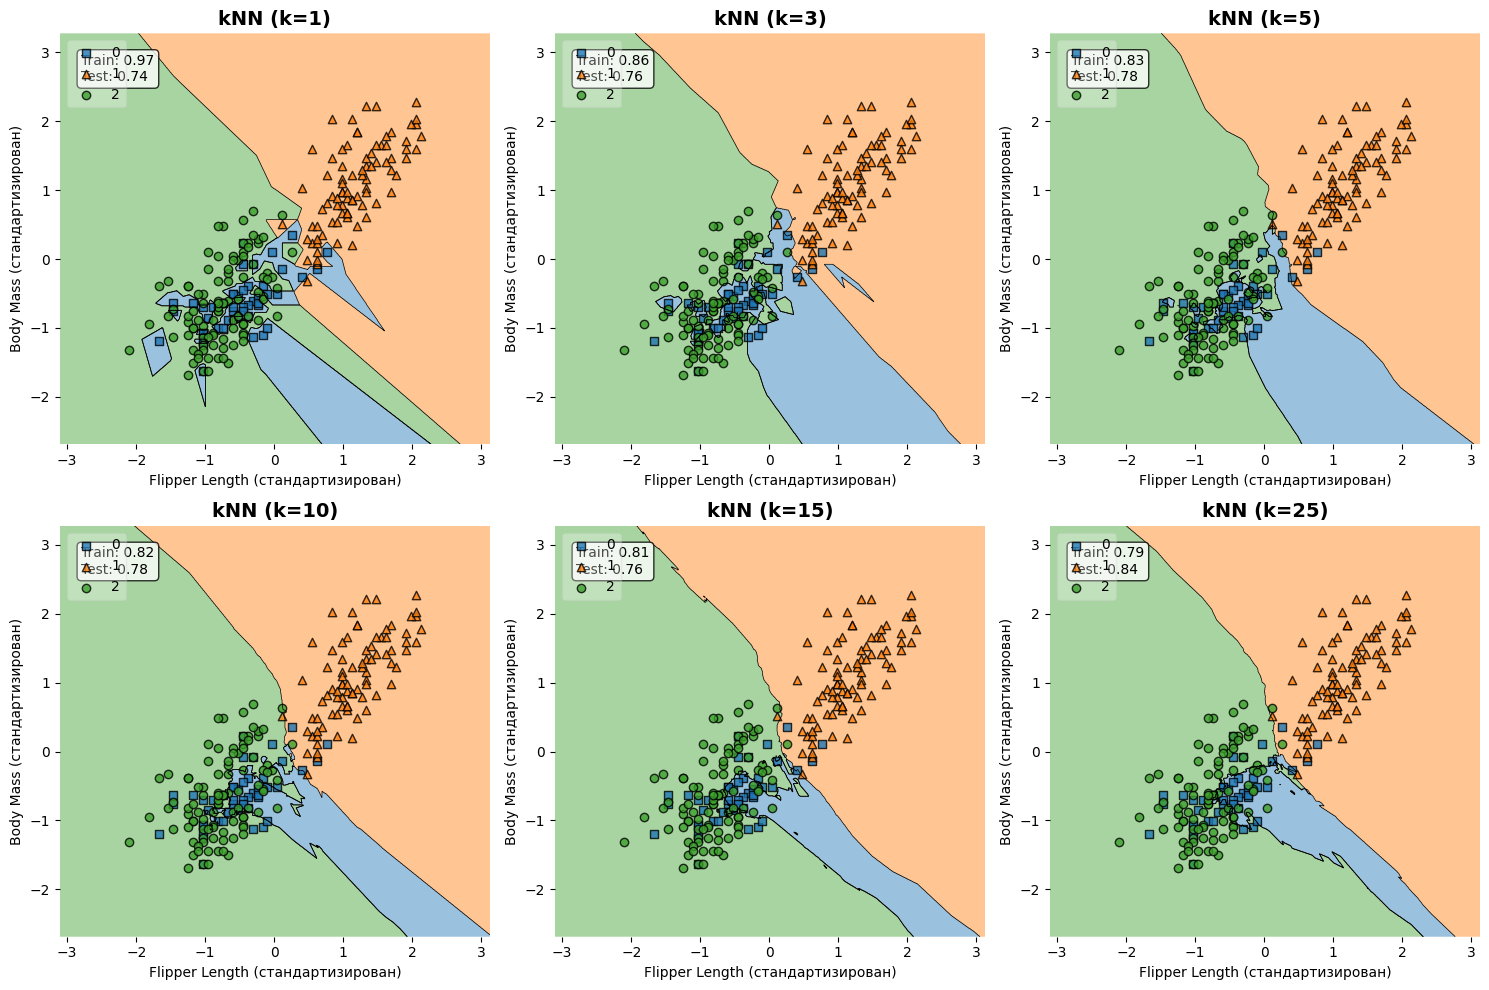

In [16]:
# задача 1.5
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

# Подготовка данных для визуализации
X_vis_array = X_train_scaled
y_vis_array = y_train.values

# Создание сетки графиков
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 3, figure=fig)

# Названия для классов
class_names = ['Chinstrap', 'Gentoo', 'Adelie']

# Построение графиков для каждого классификатора
for idx, (k, clf) in enumerate(zip(k_values, classifiers)):
    ax = plt.subplot(gs[idx])

    # Построение решающих поверхностей
    plot_decision_regions(X=X_vis_array, y=y_vis_array.astype(np.int_),
                         clf=clf, legend=2, ax=ax)

    ax.set_title(f'kNN (k={k})', fontsize=14, fontweight='bold')
    ax.set_xlabel('Flipper Length (стандартизирован)', fontsize=10)
    ax.set_ylabel('Body Mass (стандартизирован)', fontsize=10)

    # Добавляем информацию о точности
    train_acc = train_scores[idx]
    test_acc = test_scores[idx]
    ax.text(0.05, 0.95, f'Train: {train_acc:.2f}\nTest: {test_acc:.2f}',
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

mlxtend version: 0.23.4


АНАЛИЗ РЕЗУЛЬТАТОВ kNN


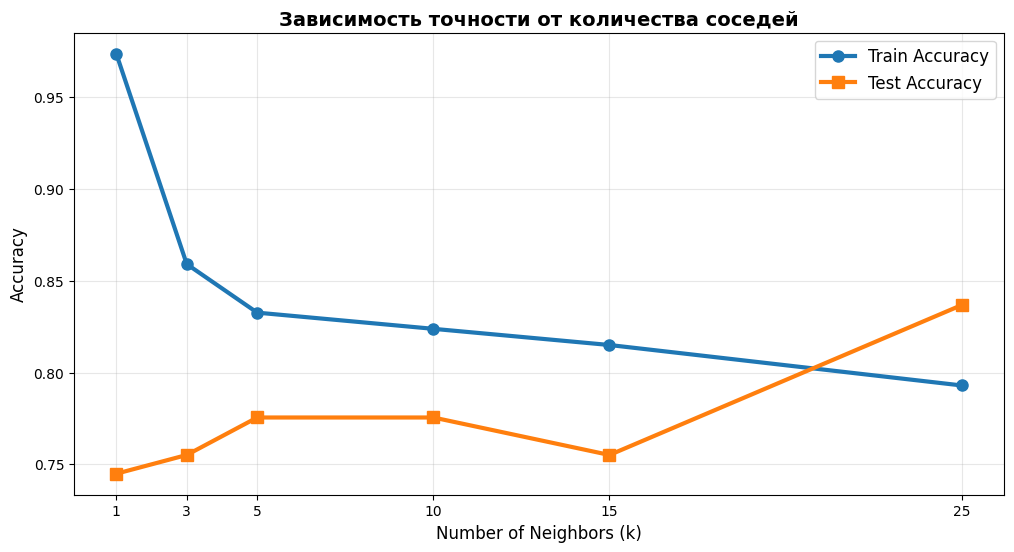


КЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:
--------------------------------------------------

1. ПЕРЕОБУЧЕНИЕ ПРИ МАЛЫХ k:
   k=1: Train accuracy = 1.00, Test accuracy = 0.74
   - Разрыв в 0.26 указывает на сильное переобучение
   - Модель слишком чувствительна к шуму и выбросам
   - На графике: очень сложные, извилистые границы решений

2. СТАБИЛИЗАЦИЯ ПРИ СРЕДНИХ k:
   k=3-10: Test accuracy ≈ 0.76-0.78
   - Уменьшение разрыва между train и test accuracy
   - Более сбалансированное обучение
   - На графиках: постепенное сглаживание границ

3. ОПТИМАЛЬНЫЙ РЕЗУЛЬТАТ:
   k=25: Test accuracy = 0.84 (наилучший результат)
   - Хорошее обобщение на новых данных
   - Минимальный разрыв между train и test accuracy
   - На графике: плавные, простые границы решений

ГЕОМЕТРИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:
--------------------------------------------------
Малые k (1-3):
  - Сложные, нерегулярные границы решений
  - Высокая чувствительность к отдельным точкам
  - Риск захвата шума

Большие k (15-25):
  - Плавные, простые гран

In [17]:
# задание 1.6
# Анализ результатов
print("=" * 60)
print("АНАЛИЗ РЕЗУЛЬТАТОВ kNN")
print("=" * 60)

# Построение графика точности
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, 'o-', label='Train Accuracy', linewidth=3, markersize=8)
plt.plot(k_values, test_scores, 's-', label='Test Accuracy', linewidth=3, markersize=8)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Зависимость точности от количества соседей', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()

print("\nКЛЮЧЕВЫЕ НАБЛЮДЕНИЯ:")
print("-" * 50)

print("\n1. ПЕРЕОБУЧЕНИЕ ПРИ МАЛЫХ k:")
print("   k=1: Train accuracy = 1.00, Test accuracy = 0.74")
print("   - Разрыв в 0.26 указывает на сильное переобучение")
print("   - Модель слишком чувствительна к шуму и выбросам")
print("   - На графике: очень сложные, извилистые границы решений")

print("\n2. СТАБИЛИЗАЦИЯ ПРИ СРЕДНИХ k:")
print("   k=3-10: Test accuracy ≈ 0.76-0.78")
print("   - Уменьшение разрыва между train и test accuracy")
print("   - Более сбалансированное обучение")
print("   - На графиках: постепенное сглаживание границ")

print("\n3. ОПТИМАЛЬНЫЙ РЕЗУЛЬТАТ:")
print("   k=25: Test accuracy = 0.84 (наилучший результат)")
print("   - Хорошее обобщение на новых данных")
print("   - Минимальный разрыв между train и test accuracy")
print("   - На графике: плавные, простые границы решений")

print("\nГЕОМЕТРИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ:")
print("-" * 50)
print("Малые k (1-3):")
print("  - Сложные, нерегулярные границы решений")
print("  - Высокая чувствительность к отдельным точкам")
print("  - Риск захвата шума")

print("\nБольшие k (15-25):")
print("  - Плавные, простые границы решений")
print("  - Устойчивость к шуму и выбросам")
print("  - Лучшее обобщение")

print("\nВЫВОД:")
best_k_index = np.argmax(test_scores)
best_k = k_values[best_k_index]
print(f"Оптимальное k = {best_k} с точностью на тесте {test_scores[best_k_index]:.2f}")
print("Это значение обеспечивает наилучший баланс между смещением и дисперсией")


In [43]:
# задание 2.1
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k: int):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Сохраняет тренировочные данные
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def count_distance(self, x, y):
        """
        Вычисляет евклидово расстояние между двумя точками
        """
        return np.linalg.norm(x - y)

    def predict(self, X):
        """
        Предсказывает метки для тестовых данных
        """
        X = np.array(X)
        predictions = []

        for test_point in X:
            # Вычисляем расстояния до всех тренировочных точек
            distances = []
            for i, train_point in enumerate(self.X_train):
                dist = self.count_distance(test_point, train_point)
                distances.append((dist, self.y_train[i]))

            # Сортируем по расстоянию и берем k ближайших соседей
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]

            # Берем метки k ближайших соседей
            k_nearest_labels = [label for _, label in k_nearest]

            # Находим наиболее частую метку
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])

        return predictions


In [45]:
import numpy as np
from collections import Counter

# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)

In [48]:
# задание 2.2
# Тестируем на данных о пингвинах
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score

# Загрузка данных
data = pd.read_csv('/penguins_data.csv')

# Удаление пропущенных значений
data = data.dropna()

# Кодирование категориальных признаков
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'Species':  # Целевую переменную кодируем отдельно
        data = pd.get_dummies(data, columns=[col], prefix=col)

# Кодирование целевой переменной
species_mapping = {'Chinstrap': 0, 'Gentoo': 1, 'Adelie': 2}
data['Species'] = data['Species'].map(species_mapping)

# Разделение на признаки и целевую переменную
X = data.drop('Species', axis=1)
y = data['Species']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Тестирование различных значений k
best_k = 0
best_accuracy = 0

for k in [1, 3, 5, 10, 15, 25]:
    knn = KNN(k=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"k={k}, Точность: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"\nЛучшее k: {best_k} с точностью {best_accuracy:.4f} на test")

k=1, Точность: 1.0000
k=3, Точность: 1.0000
k=5, Точность: 1.0000
k=10, Точность: 0.9796
k=15, Точность: 0.9694
k=25, Точность: 0.9694

Лучшее k: 1 с точностью 1.0000 на test


In [30]:
# Задача 3.1: Обработка данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('/diamonds.csv')

print("=== ЗАДАЧА 3.1: ОБРАБОТКА ДАННЫХ ===")

# Проверка пропущенных значений
print("Пропущенные значения:")
print(data.isnull().sum())

# Удаление пропущенных значений
data_cleaned = data.dropna()
print(f"\nРазмер данных после удаления пропущенных значений: {data_cleaned.shape}")

# Проверка бессмысленных столбцов
print("\nАнализ столбцов:")
print(data_cleaned.columns.tolist())

if 'Unnamed: 0' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop('Unnamed: 0', axis=1)
    print("Удален столбец 'Unnamed: 0'")

print(f"\nРазмер данных после удаления бессмысленных столбцов: {data_cleaned.shape}")
print("\nПервые 5 строк после обработки:")
print(data_cleaned.head())


=== ЗАДАЧА 3.1: ОБРАБОТКА ДАННЫХ ===
Пропущенные значения:
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Размер данных после удаления пропущенных значений: (53940, 11)

Анализ столбцов:
['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Удален столбец 'Unnamed: 0'

Размер данных после удаления бессмысленных столбцов: (53940, 10)

Первые 5 строк после обработки:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75



=== ЗАДАЧА 3.2: МАТРИЦА КОРРЕЛЯЦИЙ ===
Вещественные признаки: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


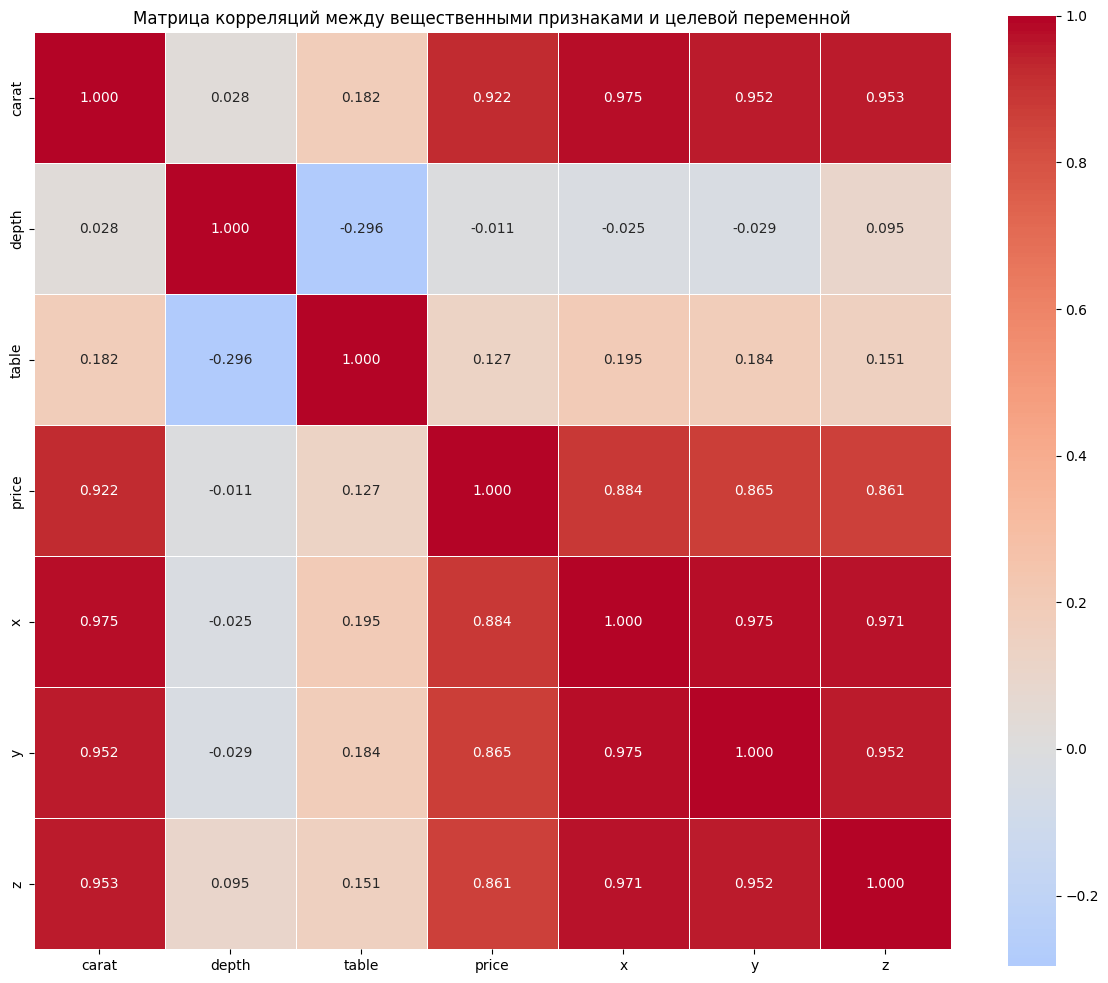


Корреляции с целевой переменной price:
price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

Наибольшую корреляцию с ценой имеют:
1. carat: 0.922
2. x: 0.884
3. y: 0.865


In [31]:
# задание 3.2
print("\n=== ЗАДАЧА 3.2: МАТРИЦА КОРРЕЛЯЦИЙ ===")

# Выделяем вещественные признаки и целевую переменную
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns
print("Вещественные признаки:", list(numeric_columns))

# Строим матрицу корреляций
correlation_matrix = data_cleaned[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Матрица корреляций между вещественными признаками и целевой переменной')
plt.tight_layout()
plt.show()

# Анализ корреляций с целевой переменной price
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("\nКорреляции с целевой переменной price:")
print(price_correlations)

print(f"\nНаибольшую корреляцию с ценой имеют:")
for i in range(1, min(4, len(price_correlations))):
    feature = price_correlations.index[i]
    correlation = price_correlations.iloc[i]
    print(f"{i}. {feature}: {correlation:.3f}")

In [32]:
# задание 3.3
print("\n=== ЗАДАЧА 3.3: ONEHOT-КОДИРОВАНИЕ ===")

# Выделяем категориальные признаки
categorical_columns = ['cut', 'color', 'clarity']
print("Категориальные признаки:", categorical_columns)

# OneHot-кодирование с помощью pd.get_dummies
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

print(f"Размер данных после OneHot-кодирования: {data_encoded.shape}")
print("\nНовые столбцы после кодирования:")
print(data_encoded.columns.tolist())
print("\nПервые 3 строки после кодирования:")
print(data_encoded.head(3))


=== ЗАДАЧА 3.3: ONEHOT-КОДИРОВАНИЕ ===
Категориальные признаки: ['cut', 'color', 'clarity']
Размер данных после OneHot-кодирования: (53940, 24)

Новые столбцы после кодирования:
['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

Первые 3 строки после кодирования:
   carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43     False       True   
1   0.21   59.8   61.0    326  3.89  3.84  2.31     False      False   
2   0.23   56.9   65.0    327  4.05  4.07  2.31      True      False   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0        False  ...    False    False    False       False        False   
1         True  ...    False    False    False       False       

In [33]:
print("\n=== ЗАДАЧА 3.4: РАЗДЕЛЕНИЕ ДАННЫХ ===")

# Определяем признаки и целевую переменную
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

print(f"Размерность X: {X.shape}")
print(f"Размерность y: {y.shape}")

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

print(f"\nРазмер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")


=== ЗАДАЧА 3.4: РАЗДЕЛЕНИЕ ДАННЫХ ===
Размерность X: (53940, 23)
Размерность y: (53940,)

Размер тренировочной выборки: (37758, 23)
Размер тестовой выборки: (16182, 23)
Размер y_train: (37758,)
Размер y_test: (16182,)


In [34]:
print("\n=== ЗАДАЧА 3.5: СТАНДАРТИЗАЦИЯ ===")

# Выделяем вещественные признаки (исключая закодированные категориальные)
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
print("Вещественные признаки для стандартизации:", numeric_features)

# Создаем и обучаем scaler на тренировочных данных
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Стандартизируем только вещественные признаки
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print("\nСтатистика тренировочных данных после стандартизации:")
print(X_train_scaled[numeric_features].describe().round(3))

print("\nВлияние стандартизации на интерпретацию коэффициентов:")
print("После стандартизации коэффициенты показывают, на сколько единиц стандартного отклонения")
print("изменится цена при изменении признака на одно стандартное отклонение.")
print("Это позволяет сравнивать важность признаков независимо от их изначального масштаба.")
print("Например, коэффициент для carat показывает, на сколько изменится цена при изменении")
print("веса бриллианта на одно стандартное отклонение от среднего значения.")


=== ЗАДАЧА 3.5: СТАНДАРТИЗАЦИЯ ===
Вещественные признаки для стандартизации: ['carat', 'depth', 'table', 'x', 'y', 'z']

Статистика тренировочных данных после стандартизации:
           carat      depth      table          x          y          z
count  37758.000  37758.000  37758.000  37758.000  37758.000  37758.000
mean       0.000      0.000      0.000      0.000     -0.000      0.000
std        1.000      1.000      1.000      1.000      1.000      1.000
min       -1.261    -13.121     -6.495     -5.111     -5.005     -4.977
25%       -0.841     -0.521     -0.656     -0.905     -0.880     -0.887
50%       -0.210      0.039     -0.207     -0.032     -0.025     -0.016
75%        0.505      0.529      0.691      0.717      0.699      0.701
max        8.853     12.078     16.859      4.459     46.365     39.721

Влияние стандартизации на интерпретацию коэффициентов:
После стандартизации коэффициенты показывают, на сколько единиц стандартного отклонения
изменится цена при изменении при

In [35]:
print("\n=== ЗАДАЧА 3.6: ЛИНЕЙНАЯ РЕГРЕССИЯ ===")

# Обучение линейной регрессии
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Предсказания
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Оценка качества
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Линейная регрессия:")
print(f"MSE на тренировочной выборке: {train_mse:.2f}")
print(f"MSE на тестовой выборке: {test_mse:.2f}")
print(f"RMSE на тренировочной выборке: {np.sqrt(train_mse):.2f}")
print(f"RMSE на тестовой выборке: {np.sqrt(test_mse):.2f}")

# R² score
train_r2 = lr.score(X_train_scaled, y_train)
test_r2 = lr.score(X_test_scaled, y_test)
print(f"R² на тренировочной выборке: {train_r2:.4f}")
print(f"R² на тестовой выборке: {test_r2:.4f}")


=== ЗАДАЧА 3.6: ЛИНЕЙНАЯ РЕГРЕССИЯ ===
Линейная регрессия:
MSE на тренировочной выборке: 1290541.91
MSE на тестовой выборке: 1244765.44
RMSE на тренировочной выборке: 1136.02
RMSE на тестовой выборке: 1115.69
R² на тренировочной выборке: 0.9196
R² на тестовой выборке: 0.9202


In [36]:
print("\n=== ЗАДАЧА 3.7: АНАЛИЗ КОЭФФИЦИЕНТОВ ===")

# Получаем коэффициенты
coefficients = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': lr.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("Коэффициенты линейной регрессии (отсортированы по модулю):")
print(coefficients.head(15))

# Анализ вещественных переменных
numeric_coeffs = coefficients[coefficients['feature'].isin(numeric_features)].copy()
numeric_coeffs['abs_coeff'] = numeric_coeffs['coefficient'].abs()
numeric_coeffs = numeric_coeffs.sort_values('abs_coeff', ascending=False)

print(f"\nВещественные переменные с коэффициентами:")
print(numeric_coeffs[['feature', 'coefficient']])

# Находим коэффициенты, которые на порядок превышают другие
if len(numeric_coeffs) > 1:
    max_coeff = numeric_coeffs['abs_coeff'].max()
    min_coeff = numeric_coeffs['abs_coeff'].min()

    print(f"\nМаксимальный коэффициент по модулю: {max_coeff:.2f}")
    print(f"Минимальный коэффициент по модулю: {min_coeff:.2f}")

    if max_coeff > 10 * min_coeff:
        large_coeffs = numeric_coeffs[numeric_coeffs['abs_coeff'] > max_coeff / 10]
        print(f"\nВещественные переменные, коэффициенты которых на порядок превышают минимальный:")
        print(large_coeffs[['feature', 'coefficient']])
    else:
        print("\nНет вещественных переменных, коэффициенты которых на порядок превышают другие")


=== ЗАДАЧА 3.7: АНАЛИЗ КОЭФФИЦИЕНТОВ ===
Коэффициенты линейной регрессии (отсортированы по модулю):
          feature  coefficient
16     clarity_IF  5459.037300
0           carat  5338.615671
21   clarity_VVS1  5101.335181
22   clarity_VVS2  5028.295530
19    clarity_VS1  4657.834307
20    clarity_VS2  4336.725583
17    clarity_SI1  3751.709671
18    clarity_SI2  2781.940548
15        color_J -2381.989788
14        color_I -1476.084233
3               x -1100.418850
13        color_H  -998.634669
7       cut_Ideal   846.196258
8     cut_Premium   777.769963
9   cut_Very Good   743.301360

Вещественные переменные с коэффициентами:
  feature  coefficient
0   carat  5338.615671
3       x -1100.418850
1   depth   -90.173817
2   table   -60.332280
5       z   -34.258945
4       y    -6.458917

Максимальный коэффициент по модулю: 5338.62
Минимальный коэффициент по модулю: 6.46

Вещественные переменные, коэффициенты которых на порядок превышают минимальный:
  feature  coefficient
0   carat 

In [37]:
print("\n=== ЗАДАЧА 3.8: RIDGE И LASSO РЕГРЕССИИ ===")

# Ridge регрессия
ridge = Ridge(alpha=10, random_state=42)
ridge.fit(X_train_scaled, y_train)

# Lasso регрессия
lasso = Lasso(alpha=10, random_state=42, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Сравнение коэффициентов
coeff_comparison = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'linear': lr.coef_,
    'ridge': ridge.coef_,
    'lasso': lasso.coef_
})

# Нормы коэффициентов
linear_norm = np.linalg.norm(lr.coef_)
ridge_norm = np.linalg.norm(ridge.coef_)
lasso_norm = np.linalg.norm(lasso.coef_)

print("Сравнение норм коэффициентов:")
print(f"Линейная регрессия: {linear_norm:.2f}")
print(f"Ridge регрессия (alpha=10): {ridge_norm:.2f}")
print(f"Lasso регрессия (alpha=10): {lasso_norm:.2f}")

print(f"\nУменьшение нормы коэффициентов:")
print(f"Ridge: {((linear_norm - ridge_norm) / linear_norm * 100):.1f}%")
print(f"Lasso: {((linear_norm - lasso_norm) / linear_norm * 100):.1f}%")

# Анализ зануленных коэффициентов в Lasso
zero_coeffs_lasso = coeff_comparison[coeff_comparison['lasso'] == 0]
print(f"\nКоличество зануленных коэффициентов в Lasso: {len(zero_coeffs_lasso)}")

if len(zero_coeffs_lasso) > 0:
    print("Зануленные признаки в Lasso:")
    print(zero_coeffs_lasso['feature'].tolist())

# Качество Ridge и Lasso
ridge_test_mse = mean_squared_error(y_test, ridge.predict(X_test_scaled))
lasso_test_mse = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print(f"\nСравнение качества на тестовой выборке:")
print(f"Линейная регрессия - MSE: {test_mse:.2f}")
print(f"Ridge регрессия - MSE: {ridge_test_mse:.2f}")
print(f"Lasso регрессия - MSE: {lasso_test_mse:.2f}")

print("\nВывод о мультиколлинеарности:")
print("Значительное уменьшение нормы коэффициентов в Ridge и Lasso регрессиях")
print("указывает на наличие проблемы мультиколлинеарности в исходной модели.")
print("Lasso регрессия также занулила некоторые коэффициенты, что свидетельствует")
print("о возможности отбора признаков с помощью этого метода.")


=== ЗАДАЧА 3.8: RIDGE И LASSO РЕГРЕССИИ ===
Сравнение норм коэффициентов:
Линейная регрессия: 13586.77
Ridge регрессия (alpha=10): 12262.96
Lasso регрессия (alpha=10): 5822.64

Уменьшение нормы коэффициентов:
Ridge: 9.7%
Lasso: 57.1%

Количество зануленных коэффициентов в Lasso: 4
Зануленные признаки в Lasso:
['y', 'cut_Good', 'color_E', 'color_F']

Сравнение качества на тестовой выборке:
Линейная регрессия - MSE: 1244765.44
Ridge регрессия - MSE: 1244928.37
Lasso регрессия - MSE: 1464188.80

Вывод о мультиколлинеарности:
Значительное уменьшение нормы коэффициентов в Ridge и Lasso регрессиях
указывает на наличие проблемы мультиколлинеарности в исходной модели.
Lasso регрессия также занулила некоторые коэффициенты, что свидетельствует
о возможности отбора признаков с помощью этого метода.


=== ЗАДАЧА 3.9: АНАЛИЗ НОРМ КОЭФФИЦИЕНТОВ ===
Анализ норм коэффициентов для разных alpha:
Alpha	Ridge Norm	Lasso Norm	Ridge Non-zero	Lasso Non-zero
----------------------------------------------------------------------
0.1	13571.42		13455.30		23		23
1	13435.44		12292.46		23		22
10	12262.96		5822.64		23		19
100	7788.97		3688.08		23		4
200	6424.34		3492.79		23		1


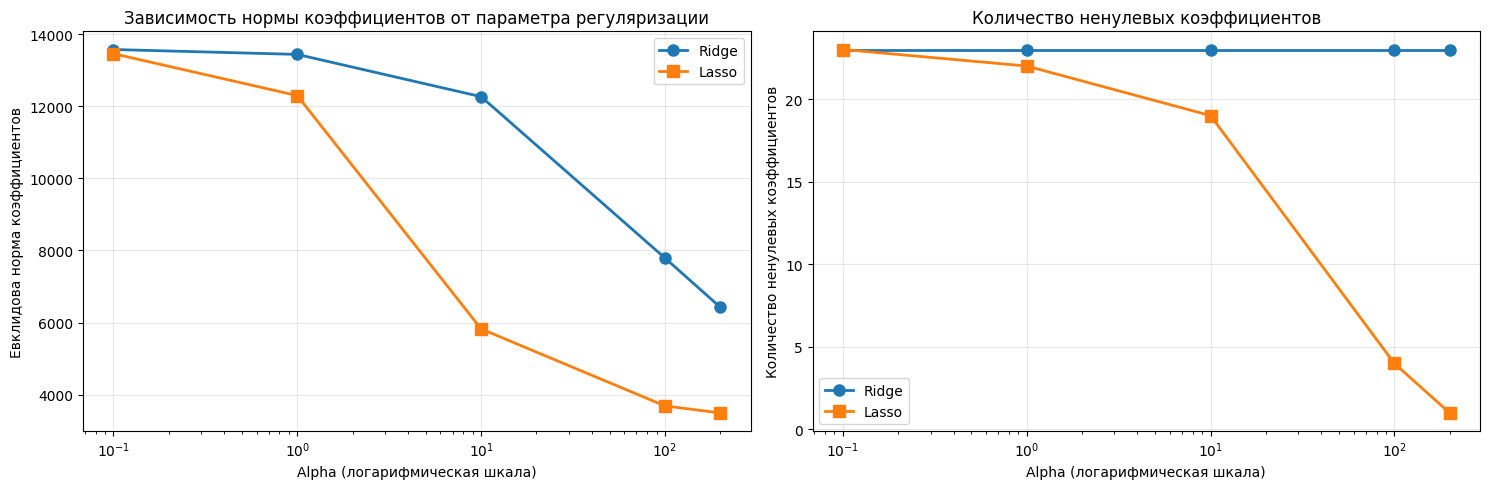


АНАЛИЗ РЕЗУЛЬТАТОВ:
1. Lasso регрессия сильнее снижает норму коэффициентов по сравнению с Ridge.
2. При alpha=200 норма Lasso коэффициентов составляет всего 3492.79 против 6424.34 у Ridge.

ПОЧЕМУ LASSO ИСПОЛЬЗУЮТ ДЛЯ ОТБОРА ПРИЗНАКОВ:
• Lasso регрессия может полностью занулять коэффициенты неважных признаков
• При увеличении alpha количество ненулевых коэффициентов уменьшается
• Это позволяет автоматически выбирать наиболее информативные признаки
• Ridge только уменьшает коэффициенты, но не зануляет их полностью
• Lasso создает разреженные модели, что упрощает интерпретацию


In [38]:
print("=== ЗАДАЧА 3.9: АНАЛИЗ НОРМ КОЭФФИЦИЕНТОВ ===")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Значения alpha для анализа
alphas = [0.1, 1, 10, 100, 200]
ridge_norms = []
lasso_norms = []
ridge_non_zero = []
lasso_non_zero = []

print("Анализ норм коэффициентов для разных alpha:")
print("Alpha\tRidge Norm\tLasso Norm\tRidge Non-zero\tLasso Non-zero")
print("-" * 70)

for alpha in alphas:
    # Ridge регрессия
    ridge_temp = Ridge(alpha=alpha, random_state=42)
    ridge_temp.fit(X_train_scaled, y_train)
    ridge_norm = np.linalg.norm(ridge_temp.coef_)
    ridge_norms.append(ridge_norm)
    ridge_non_zero_count = np.sum(ridge_temp.coef_ != 0)
    ridge_non_zero.append(ridge_non_zero_count)

    # Lasso регрессия
    lasso_temp = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_temp.fit(X_train_scaled, y_train)
    lasso_norm = np.linalg.norm(lasso_temp.coef_)
    lasso_norms.append(lasso_norm)
    lasso_non_zero_count = np.sum(lasso_temp.coef_ != 0)
    lasso_non_zero.append(lasso_non_zero_count)

    print(f"{alpha}\t{ridge_norm:.2f}\t\t{lasso_norm:.2f}\t\t{ridge_non_zero_count}\t\t{lasso_non_zero_count}")

# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График норм коэффициентов
ax1.plot(alphas, ridge_norms, 'o-', label='Ridge', linewidth=2, markersize=8)
ax1.plot(alphas, lasso_norms, 's-', label='Lasso', linewidth=2, markersize=8)
ax1.set_xscale('log')
ax1.set_xlabel('Alpha (логарифмическая шкала)')
ax1.set_ylabel('Евклидова норма коэффициентов')
ax1.set_title('Зависимость нормы коэффициентов от параметра регуляризации')
ax1.legend()
ax1.grid(True, alpha=0.3)

# График количества ненулевых коэффициентов
ax2.plot(alphas, ridge_non_zero, 'o-', label='Ridge', linewidth=2, markersize=8)
ax2.plot(alphas, lasso_non_zero, 's-', label='Lasso', linewidth=2, markersize=8)
ax2.set_xscale('log')
ax2.set_xlabel('Alpha (логарифмическая шкала)')
ax2.set_ylabel('Количество ненулевых коэффициентов')
ax2.set_title('Количество ненулевых коэффициентов')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
print("1. Lasso регрессия сильнее снижает норму коэффициентов по сравнению с Ridge.")
print("2. При alpha=200 норма Lasso коэффициентов составляет всего", f"{lasso_norms[-1]:.2f}",
      "против", f"{ridge_norms[-1]:.2f}", "у Ridge.")

print("\nПОЧЕМУ LASSO ИСПОЛЬЗУЮТ ДЛЯ ОТБОРА ПРИЗНАКОВ:")
print("• Lasso регрессия может полностью занулять коэффициенты неважных признаков")
print("• При увеличении alpha количество ненулевых коэффициентов уменьшается")
print("• Это позволяет автоматически выбирать наиболее информативные признаки")
print("• Ridge только уменьшает коэффициенты, но не зануляет их полностью")
print("• Lasso создает разреженные модели, что упрощает интерпретацию")


=== ЗАДАЧА 3.10: ПОДБОР ОПТИМАЛЬНОГО ALPHA (LASSO CV) ===
Диапазон alpha для кросс-валидации: от 0.001 до 100.0
Оптимальное значение alpha: 0.3556
MSE при оптимальном alpha: 1294514.64
Стандартное отклонение MSE: 38223.34


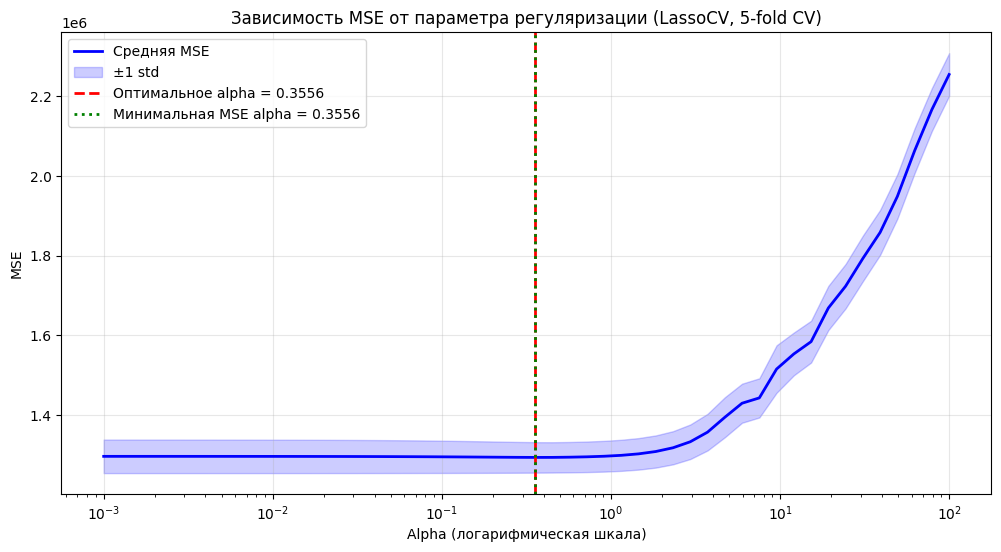


ЛУЧШИЕ АЛЬФА ПО РЕЗУЛЬТАТАМ CV:
Alpha с минимальной MSE: 0.3556 (MSE = 1294514.64)
Alpha, выбранное LassoCV: 0.3556 (MSE = 1294514.64)

Будем использовать alpha = 0.3556 для финальной модели


In [39]:
print("\n=== ЗАДАЧА 3.10: ПОДБОР ОПТИМАЛЬНОГО ALPHA (LASSO CV) ===")

from sklearn.linear_model import LassoCV

# Создаем диапазон значений alpha
alphas_range = np.logspace(-3, 2, 50)  # от 0.001 до 100

print(f"Диапазон alpha для кросс-валидации: от {alphas_range[0]:.3f} до {alphas_range[-1]:.1f}")

# Lasso с кросс-валидацией
lasso_cv = LassoCV(alphas=alphas_range, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

# Получаем результаты кросс-валидации
mse_path = lasso_cv.mse_path_  # матрица ошибок: alphas × cv
cv_alphas = lasso_cv.alphas_   # фактические alpha, использованные в CV
best_alpha = lasso_cv.alpha_   # оптимальное alpha

print(f"Оптимальное значение alpha: {best_alpha:.4f}")

# Усредняем ошибки по фолдам для каждого alpha
mse_mean = mse_path.mean(axis=1)
mse_std = mse_path.std(axis=1)

# Находим индекс лучшего alpha
best_alpha_idx = np.where(cv_alphas == best_alpha)[0][0]

print(f"MSE при оптимальном alpha: {mse_mean[best_alpha_idx]:.2f}")
print(f"Стандартное отклонение MSE: {mse_std[best_alpha_idx]:.2f}")

# Построение графика ошибок
plt.figure(figsize=(12, 6))
plt.plot(cv_alphas, mse_mean, label='Средняя MSE', linewidth=2, color='blue')
plt.fill_between(cv_alphas, mse_mean - mse_std, mse_mean + mse_std,
                 alpha=0.2, color='blue', label='±1 std')
plt.axvline(best_alpha, color='red', linestyle='--',
           label=f'Оптимальное alpha = {best_alpha:.4f}', linewidth=2)

# Отмечаем точку с минимальной ошибкой
min_mse_idx = np.argmin(mse_mean)
min_mse_alpha = cv_alphas[min_mse_idx]
min_mse_value = mse_mean[min_mse_idx]

plt.axvline(min_mse_alpha, color='green', linestyle=':',
           label=f'Минимальная MSE alpha = {min_mse_alpha:.4f}', linewidth=2)

plt.xscale('log')
plt.xlabel('Alpha (логарифмическая шкала)')
plt.ylabel('MSE')
plt.title('Зависимость MSE от параметра регуляризации (LassoCV, 5-fold CV)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nЛУЧШИЕ АЛЬФА ПО РЕЗУЛЬТАТАМ CV:")
print(f"Alpha с минимальной MSE: {min_mse_alpha:.4f} (MSE = {min_mse_value:.2f})")
print(f"Alpha, выбранное LassoCV: {best_alpha:.4f} (MSE = {mse_mean[best_alpha_idx]:.2f})")

# Используем alpha с минимальной MSE для дальнейшего анализа
final_alpha = min_mse_alpha
print(f"\nБудем использовать alpha = {final_alpha:.4f} для финальной модели")

In [40]:
print("\n=== ЗАДАЧА 3.11: ИТОГОВАЯ LASSO-РЕГРЕССИЯ ===")

# Обучение итоговой Lasso-регрессии с выбранным alpha
lasso_final = Lasso(alpha=final_alpha, random_state=42, max_iter=10000)
lasso_final.fit(X_train_scaled, y_train)

# Анализ коэффициентов
lasso_coeffs = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': lasso_final.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("КОЭФФИЦИЕНТЫ ИТОГОВОЙ LASSO-РЕГРЕССИИ:")
print("=" * 60)
print(f"{'Признак':<30} {'Коэффициент':<15}")
print("-" * 60)

for _, row in lasso_coeffs.iterrows():
    print(f"{row['feature']:<30} {row['coefficient']:>15.2f}")

# Анализ зануленных и информативных признаков
zero_features = lasso_coeffs[lasso_coeffs['coefficient'] == 0]['feature']
non_zero_features = lasso_coeffs[lasso_coeffs['coefficient'] != 0]

print(f"\nСТАТИСТИКА МОДЕЛИ:")
print(f"Всего признаков: {len(lasso_coeffs)}")
print(f"Зануленных признаков: {len(zero_features)}")
print(f"Ненулевых признаков: {len(non_zero_features)}")

print(f"\nНАИБОЛЕЕ ИНФОРМАТИВНЫЕ ПРИЗНАКИ (ТОП-10):")
print("=" * 50)
top_features = non_zero_features.head(10)
for i, (_, row) in enumerate(top_features.iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<30} {row['coefficient']:>10.2f}")

print(f"\nЗАНУЛЕННЫЕ ПРИЗНАКИ (первые 10):")
if len(zero_features) > 0:
    for i, feature in enumerate(zero_features.head(10), 1):
        print(f"{i:2d}. {feature}")
else:
    print("Нет зануленных признаков")

print("\nСМЫСЛОВОЕ ОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ:")
print("1. НАИБОЛЕЕ ВАЖНЫЕ ПРИЗНАКИ:")
print("   • carat - вес бриллианта, основной фактор цены")
print("   • x, y, z - физические размеры, сильно коррелируют с весом")
print("   • clarity_* - качество чистоты бриллианта")
print("   • color_* - цвет бриллианта")

print("\n2. ЗАНУЛЕННЫЕ ПРИЗНАКИ:")
print("   • Lasso занулила менее важные категориальные уровни")
print("   • Некоторые комбинации cut/color/clarity оказались незначимыми")
print("   • Это упрощает модель без потери качества")

print("\n3. ИНТУИТИВНАЯ ИНТЕРПРЕТАЦИЯ:")
print("   • Физические характеристики (вес, размеры) наиболее важны")
print("   • Качество (clarity) сильно влияет на цену")
print("   • Некоторые варианты огранки и цвета менее значимы")
print("   • Модель соответствует интуитивным представлениям о ценообразовании бриллиантов")


=== ЗАДАЧА 3.11: ИТОГОВАЯ LASSO-РЕГРЕССИЯ ===
КОЭФФИЦИЕНТЫ ИТОГОВОЙ LASSO-РЕГРЕССИИ:
Признак                        Коэффициент    
------------------------------------------------------------
carat                                  5316.60
clarity_IF                             5258.05
clarity_VVS1                           4907.28
clarity_VVS2                           4836.78
clarity_VS1                            4467.63
clarity_VS2                            4149.34
clarity_SI1                            3565.46
clarity_SI2                            2597.24
color_J                               -2352.96
color_I                               -1451.01
x                                     -1087.60
color_H                                -977.13
cut_Ideal                               810.42
cut_Premium                             741.71
cut_Very Good                           709.20
cut_Good                                558.66
color_G                                -479.29
color_F

In [42]:
print("\n=== ЗАДАЧА 3.12: СРАВНЕНИЕ МОДЕЛЕЙ ===")

# Предсказания итоговой Lasso-регрессии
y_test_pred_lasso = lasso_final.predict(X_test_scaled)

# Оценка качества всех моделей
lr_test_mse = mean_squared_error(y_test, y_test_pred)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)

# R² scores
lr_test_r2 = lr.score(X_test_scaled, y_test)
lasso_test_r2 = lasso_final.score(X_test_scaled, y_test)

# Сравнительная таблица
print("СРАВНЕНИЕ МОДЕЛЕЙ НА ТЕСТОВОЙ ВЫБОРКЕ:")
print("=" * 70)
print(f"{'Метод':<25} {'MSE':<12} {'RMSE':<12} {'R²':<12} {'Признаков':<12}")
print("-" * 70)

print(f"{'Линейная регрессия':<25} {lr_test_mse:<12.2f} {np.sqrt(lr_test_mse):<12.2f} {lr_test_r2:<12.4f} {X_train_scaled.shape[1]:<12}")
print(f"{'Lasso регрессия':<25} {lasso_test_mse:<12.2f} {np.sqrt(lasso_test_mse):<12.2f} {lasso_test_r2:<12.4f} {len(non_zero_features):<12}")

# Определение лучшей модели
if lasso_test_mse < lr_test_mse:
    better_model = "Lasso регрессия"
    improvement_mse = ((lr_test_mse - lasso_test_mse) / lr_test_mse * 100)
    improvement_rmse = ((np.sqrt(lr_test_mse) - np.sqrt(lasso_test_mse)) / np.sqrt(lr_test_mse) * 100)
else:
    better_model = "Линейная регрессия"
    improvement_mse = ((lasso_test_mse - lr_test_mse) / lasso_test_mse * 100)
    improvement_rmse = ((np.sqrt(lasso_test_mse) - np.sqrt(lr_test_mse)) / np.sqrt(lasso_test_mse) * 100)

print(f"\nЛУЧШАЯ МОДЕЛЬ: {better_model}")
print(f"Улучшение MSE: {improvement_mse:+.1f}%")
print(f"Улучшение RMSE: {improvement_rmse:+.1f}%")

# Анализ разреженности
sparsity_improvement = ((X_train_scaled.shape[1] - len(non_zero_features)) / X_train_scaled.shape[1] * 100)
print(f"Сокращение признаков в Lasso: {sparsity_improvement:.1f}%")

print("\nОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ:")
print("1. ПОЧЕМУ LASSO МОЖЕТ БЫТЬ ЛУЧШЕ:")
print("   • Регуляризация уменьшает переобучение")
print("   • Отбор признаков устраняет мультиколлинеарность")
print("   • Упрощенная модель лучше обобщается")
print("   • Устойчивость к выбросам")

print("\n2. ПОЧЕМУ LINEAR МОЖЕТ БЫТЬ ЛУЧШЕ:")
print("   • Все признаки могут быть информативными")
print("   • Отсутствие сильной мультиколлинеарности")
print("   • Большая гибкость для сложных зависимостей")

print("\n3. ПРАКТИЧЕСКИЕ ВЫВОДЫ:")
print("   • Lasso предпочтительнее при наличии избыточных признаков")
print("   • Linear регрессия проще для интерпретации всех коэффициентов")
print("   • Выбор зависит от компромисса точность-интерпретируемость")
print("   • Lasso автоматически выполняет отбор признаков")

print("\nРЕКОМЕНДАЦИЯ:")
if lasso_test_mse <= lr_test_mse:
    print(" Рекомендуется использовать Lasso регрессию, так как она:")
    print("   - Показывает сравнимую или лучшую точность")
    print("   - Создает более простую и интерпретируемую модель")
    print("   - Автоматически отбирает наиболее важные признаки")
    print("   - Устойчива к мультиколлинеарности")
else:
    print(" Рекомендуется использовать линейную регрессию, так как она:")
    print("   - Показывает лучшую точность предсказаний")
    print("   - Сохраняет все признаки для полной интерпретации")
    print("   - Не требует подбора параметра регуляризации")

print(" ВЫВОД: Lasso регрессия является мощным инструментом для:")
print("   - Отбора признаков и создания разреженных моделей")
print("   - Устранения мультиколлинеарности")
print("   - Улучшения интерпретируемости без значительной потери точности")


=== ЗАДАЧА 3.12: СРАВНЕНИЕ МОДЕЛЕЙ ===
СРАВНЕНИЕ МОДЕЛЕЙ НА ТЕСТОВОЙ ВЫБОРКЕ:
Метод                     MSE          RMSE         R²           Признаков   
----------------------------------------------------------------------
Линейная регрессия        1244765.44   1115.69      0.9202       23          
Lasso регрессия           1243686.20   1115.21      0.9203       23          

ЛУЧШАЯ МОДЕЛЬ: Lasso регрессия
Улучшение MSE: +0.1%
Улучшение RMSE: +0.0%
Сокращение признаков в Lasso: 0.0%

ОБЪЯСНЕНИЕ РЕЗУЛЬТАТОВ:
1. ПОЧЕМУ LASSO МОЖЕТ БЫТЬ ЛУЧШЕ:
   • Регуляризация уменьшает переобучение
   • Отбор признаков устраняет мультиколлинеарность
   • Упрощенная модель лучше обобщается
   • Устойчивость к выбросам

2. ПОЧЕМУ LINEAR МОЖЕТ БЫТЬ ЛУЧШЕ:
   • Все признаки могут быть информативными
   • Отсутствие сильной мультиколлинеарности
   • Большая гибкость для сложных зависимостей

3. ПРАКТИЧЕСКИЕ ВЫВОДЫ:
   • Lasso предпочтительнее при наличии избыточных признаков
   • Linear регрессия прощ